In [ ]:
import os
import sys
import keras
import tarfile
import numpy as np
import tensorflow as tf
import urllib.request as urllib
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.engine.training import Model
from keras import backend as K, regularizers
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Add, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Help from http://165.132.29.26/upfiles/15159371917373.pdf

from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = '/content/gdrive/My Drive/Temp/Intel/seg_train/seg_train'
categories = sorted(os.listdir(caltech_dir))
nb_classes = len(categories)

X = []
Y = []
image_w = 64
image_h = 64

for idx, f in enumerate(categories):
    label = [0 for i in range(nb_classes)] 
    label[idx] = 1
    image_dir = caltech_dir + "/" + f 
    files = glob.glob(image_dir + "/*.jpg")
    print('Outer', idx)

    for i, fname in enumerate(files):
        print('Inner', i)
        img = Image.open(fname)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        X.append(data)
        Y.append(label)
          
for ang in range(-20, 20, 5):
    img2 = img.rotate(ang)
    data = np.asarray(img2) 
    X.append(data)
    Y.append(label)

    img2 = img2.transpose(Image.FLIP_LEFT_RIGHT)
    data = np.asarray(img2) 
    X.append(data)
    Y.append(label)

Streaming output truncated to the last 5000 lines.
Inner 1352
Inner 1353
Inner 1354
Inner 1355
Inner 1356
Inner 1357
Inner 1358
Inner 1359
Inner 1360
Inner 1361
Inner 1362
Inner 1363
Inner 1364
Inner 1365
Inner 1366
Inner 1367
Inner 1368
Inner 1369
Inner 1370
Inner 1371
Inner 1372
Inner 1373
Inner 1374
Inner 1375
Inner 1376
Inner 1377
Inner 1378
Inner 1379
Inner 1380
Inner 1381
Inner 1382
Inner 1383
Inner 1384
Inner 1385
Inner 1386
Inner 1387
Inner 1388
Inner 1389
Inner 1390
Inner 1391
Inner 1392
Inner 1393
Inner 1394
Inner 1395
Inner 1396
Inner 1397
Inner 1398
Inner 1399
Inner 1400
Inner 1401
Inner 1402
Inner 1403
Inner 1404
Inner 1405
Inner 1406
Inner 1407
Inner 1408
Inner 1409
Inner 1410
Inner 1411
Inner 1412
Inner 1413
Inner 1414
Inner 1415
Inner 1416
Inner 1417
Inner 1418
Inner 1419
Inner 1420
Inner 1421
Inner 1422
Inner 1423
Inner 1424
Inner 1425
Inner 1426
Inner 1427
Inner 1428
Inner 1429
Inner 1430
Inner 1431
Inner 1432
Inner 1433
Inner 1434
Inner 1435
Inner 1436
Inner 1437
Inn

In [ ]:
X = np.array(X)
Y = np.array(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
print('X_train shape: ', x_train.shape[0])
print('Y_train shape: ', y_train.shape)

X_train shape:  8119
Y_train shape:  (8119, 6)


Train: X=(8119, 64, 64, 3), y=(8119, 6)
Test: X=(2707, 64, 64, 3), y=(2707, 6)


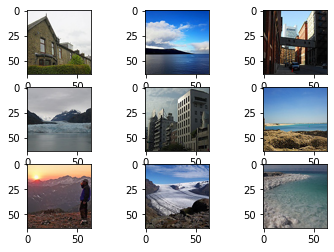

In [ ]:
from matplotlib import pyplot

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)

	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

In [ ]:
model = Sequential()

# Block 1
model.add(Conv2D(32, kernel_size=3, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same', input_shape=(64, 64, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# Block 2
model.add(Conv2D(64, kernel_size=3, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(2, 2))

# Block 3
model.add(Conv2D(128, kernel_size=3, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# Block 4
model.add(Conv2D(256, kernel_size=3, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(2, 2))

# Block 5
model.add(Conv2D(512, kernel_size=3, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# Block 6
model.add(Conv2D(1024, kernel_size=3, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(2, 2))

# Block 7
model.add(Conv2D(2048, kernel_size=3, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# Block 8
model.add(Conv2D(2048, kernel_size=3, kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(2, 2))

model.add(Flatten())

# Dense 1
model.add(Dense(2480, kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Dense 2
model.add(Dense(1240, kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Dense 3
model.add(Dense(6, kernel_regularizer=l2(0.0005), activation='softmax'))

# Visualize Model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 64)       

In [ ]:
initial_lr = 1e-3

def lr_scheduler(epoch):
    if epoch < 2:
        return initial_lr
    elif epoch < 4:
        return initial_lr / 20
    elif epoch < 5:
        return initial_lr / 40
    elif epoch < 6:
        return initial_lr / 80
    elif epoch < 7:
        return initial_lr / 160
    elif epoch < 8:
        return initial_lr / 320
    elif epoch < 9:
        return initial_lr / 640
    else:
        return initial_lr / 1280

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(initial_lr),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
  x_train, y_train,
  epochs=25,
  verbose=1,
  validation_data=(x_test, y_test),
  callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler)],
  shuffle=True
)

Epoch 1/25
254/254 [==============================] - 52s 203ms/step - loss: 10.0427 - accuracy: 0.6450 - val_loss: 7.0383 - val_accuracy: 0.5755
Epoch 2/25
254/254 [==============================] - 51s 201ms/step - loss: 4.8167 - accuracy: 0.7316 - val_loss: 3.6482 - val_accuracy: 0.6029
Epoch 3/25
254/254 [==============================] - 51s 202ms/step - loss: 3.1205 - accuracy: 0.7905 - val_loss: 2.9669 - val_accuracy: 0.8319
Epoch 4/25
254/254 [==============================] - 51s 202ms/step - loss: 2.9010 - accuracy: 0.8214 - val_loss: 2.7953 - val_accuracy: 0.8389
Epoch 5/25
254/254 [==============================] - 51s 203ms/step - loss: 2.7516 - accuracy: 0.8297 - val_loss: 2.6738 - val_accuracy: 0.8493
Epoch 6/25
254/254 [==============================] - 52s 203ms/step - loss: 2.6654 - accuracy: 0.8369 - val_loss: 2.6129 - val_accuracy: 0.8508
Epoch 7/25
254/254 [==============================] - 51s 203ms/step - loss: 2.6170 - accuracy: 0.8451 - val_loss: 2.5769 - val_a

Test loss: 2.4041123390197754 / Test accuracy: 85.55596470832825


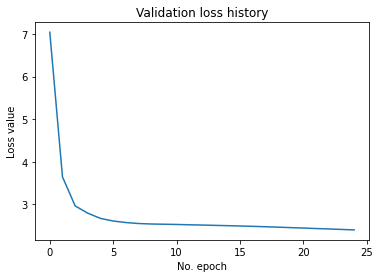

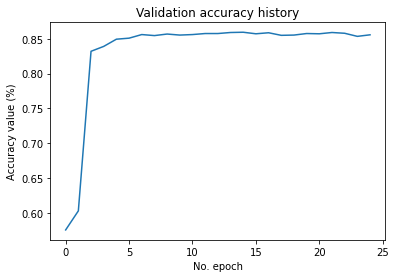

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]*100}')

# Visualize history
# plt history: Loss
plt.plt(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# plt history: Accuracy
plt.plt(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
initial_lr = 1e-5

def lr_scheduler(epoch):
    if epoch < 2:
        return initial_lr
    elif epoch < 4:
        return initial_lr / 20
    elif epoch < 5:
        return initial_lr / 40
    elif epoch < 6:
        return initial_lr / 80
    elif epoch < 7:
        return initial_lr / 160
    elif epoch < 8:
        return initial_lr / 320
    elif epoch < 9:
        return initial_lr / 640
    else:
        return initial_lr / 1280

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(initial_lr),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
  x_train, y_train,
  epochs=25,
  verbose=1,
  validation_data=(x_test, y_test),
  callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler)],
  shuffle=True
)

Epoch 1/25
254/254 [==============================] - 51s 203ms/step - loss: 2.3478 - accuracy: 0.8518 - val_loss: 2.2783 - val_accuracy: 0.8489
Epoch 2/25
254/254 [==============================] - 51s 201ms/step - loss: 2.2075 - accuracy: 0.8609 - val_loss: 2.1507 - val_accuracy: 0.8570
Epoch 3/25
254/254 [==============================] - 51s 201ms/step - loss: 2.1249 - accuracy: 0.8650 - val_loss: 2.1338 - val_accuracy: 0.8593
Epoch 4/25
254/254 [==============================] - 51s 201ms/step - loss: 2.1245 - accuracy: 0.8666 - val_loss: 2.1265 - val_accuracy: 0.8622
Epoch 5/25
254/254 [==============================] - 51s 202ms/step - loss: 2.1222 - accuracy: 0.8715 - val_loss: 2.1241 - val_accuracy: 0.8618
Epoch 6/25
254/254 [==============================] - 51s 202ms/step - loss: 2.1157 - accuracy: 0.8678 - val_loss: 2.1212 - val_accuracy: 0.8622
Epoch 7/25
254/254 [==============================] - 51s 202ms/step - loss: 2.1043 - accuracy: 0.8726 - val_loss: 2.1211 - val_ac

Test loss: 2.118380069732666 / Test accuracy: 86.25785112380981


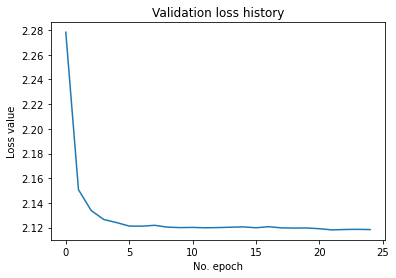

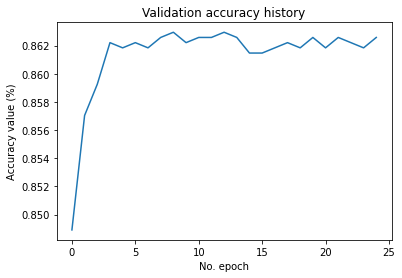

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]*100}')

# Visualize history
# plt history: Loss
plt.plt(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# plt history: Accuracy
plt.plt(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
initial_lr = 1e-8

def lr_scheduler(epoch):
    if epoch < 2:
        return initial_lr
    elif epoch < 4:
        return initial_lr / 20
    elif epoch < 5:
        return initial_lr / 40
    elif epoch < 6:
        return initial_lr / 80
    elif epoch < 7:
        return initial_lr / 160
    elif epoch < 8:
        return initial_lr / 32
    elif epoch < 9:
        return initial_lr / 640
    else:
        return initial_lr / 1280

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(initial_lr),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
  x_train, y_train,
  epochs=25,
  verbose=1,
  validation_data=(x_test, y_test),
  callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler)],
  shuffle=True
)

Epoch 1/25
254/254 [==============================] - 51s 202ms/step - loss: 2.1096 - accuracy: 0.8733 - val_loss: 2.1188 - val_accuracy: 0.8629
Epoch 2/25
254/254 [==============================] - 51s 201ms/step - loss: 2.0999 - accuracy: 0.8749 - val_loss: 2.1187 - val_accuracy: 0.8626
Epoch 3/25
254/254 [==============================] - 51s 201ms/step - loss: 2.1003 - accuracy: 0.8736 - val_loss: 2.1194 - val_accuracy: 0.8618
Epoch 4/25
254/254 [==============================] - 51s 201ms/step - loss: 2.1067 - accuracy: 0.8688 - val_loss: 2.1182 - val_accuracy: 0.8626
Epoch 5/25
254/254 [==============================] - 51s 201ms/step - loss: 2.1119 - accuracy: 0.8709 - val_loss: 2.1183 - val_accuracy: 0.8626
Epoch 6/25
254/254 [==============================] - 51s 201ms/step - loss: 2.1102 - accuracy: 0.8722 - val_loss: 2.1181 - val_accuracy: 0.8622
Epoch 7/25
254/254 [==============================] - 51s 201ms/step - loss: 2.1068 - accuracy: 0.8712 - val_loss: 2.1187 - val_ac

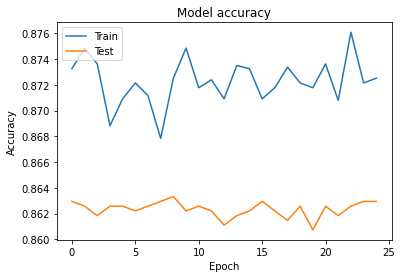

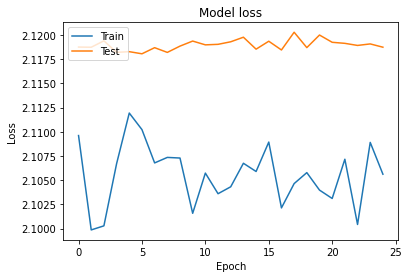

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()